In [49]:
import pandas as pd

In [50]:
dataframe = pd.read_csv("../data/Energy-balance-Day-Transfo-1A-2025-05-02.csv", delimiter=";", skiprows=10, parse_dates=['Time period'])
dataframe

C:\Users\lenovo\AppData\Local\Temp\ipykernel_13716\341840597.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dataframe = pd.read_csv("../data/Energy-balance-Day-Transfo-1A-2025-05-02.csv", delimiter=";", skiprows=10, parse_dates=['Time period'])


,Time period,Direct consumption [kW],Grid-supplied power [kW],Grid feed-in [kW],Total consumption [kW],Total generation [kW]
0,12.05 AM,0,"188,57",0,"188,57",0
1,12.10 AM,0,"184,42",0,"184,42",0
2,12.15 AM,0,"190,01",0,"190,01",0
3,12.20 AM,0,"198,44",0,"198,44",0
4,12.25 AM,0,"184,67",0,"184,67",0
...,...,...,...,...,...,...
283,11.40 PM,0,"193,42",0,"193,42",0
284,11.45 PM,0,"175,06",0,"175,06",0
285,11.50 PM,0,"192,48",0,"192,48",0
286,11.55 PM,0,"176,46",0,"176,46",0


In [51]:
dataframe.columns

Index(['Time period', 'Direct consumption [kW]', 'Grid-supplied power [kW]',
       'Grid feed-in [kW]', 'Total consumption [kW]', 'Total generation [kW]'],
      dtype='object')

In [52]:
# changer le nom de la colonne du temps
dataframe = dataframe.rename(columns={'Time period': 'time'})
dataframe = dataframe.set_index('time')

In [53]:
# Mettre les ligne en ordre en fonction de l'index aui est le temps
dataframe = dataframe.sort_index()

In [54]:
# Debut du document
dataframe.head()

,Direct consumption [kW],Grid-supplied power [kW],Grid feed-in [kW],Total consumption [kW],Total generation [kW]
time,,,,,
01.00 AM,0,"174,86",0,"174,86",0
01.00 PM,"33,48","153,24",0,"186,72","33,48"
01.05 AM,0,"200,97",0,"200,97",0
01.05 PM,"29,13","176,95",0,"206,08","29,13"
01.10 AM,0,"182,77",0,"182,77",0


In [55]:
# info su r les donnees
print("DataFrame Info:")
dataframe.info()

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
Index: 288 entries, 01.00 AM to 12.55 PM
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Direct consumption [kW]   288 non-null    object
 1   Grid-supplied power [kW]  288 non-null    object
 2   Grid feed-in [kW]         288 non-null    int64 
 3   Total consumption [kW]    288 non-null    object
 4   Total generation [kW]     288 non-null    object
dtypes: int64(1), object(4)
memory usage: 13.5+ KB


In [56]:
# Regardond levolution du temps
print(f"Debut: {dataframe.index.min()}")
print(f"Fin: {dataframe.index.max()}")

Debut: 01.00 AM
Fin: 12.55 PM


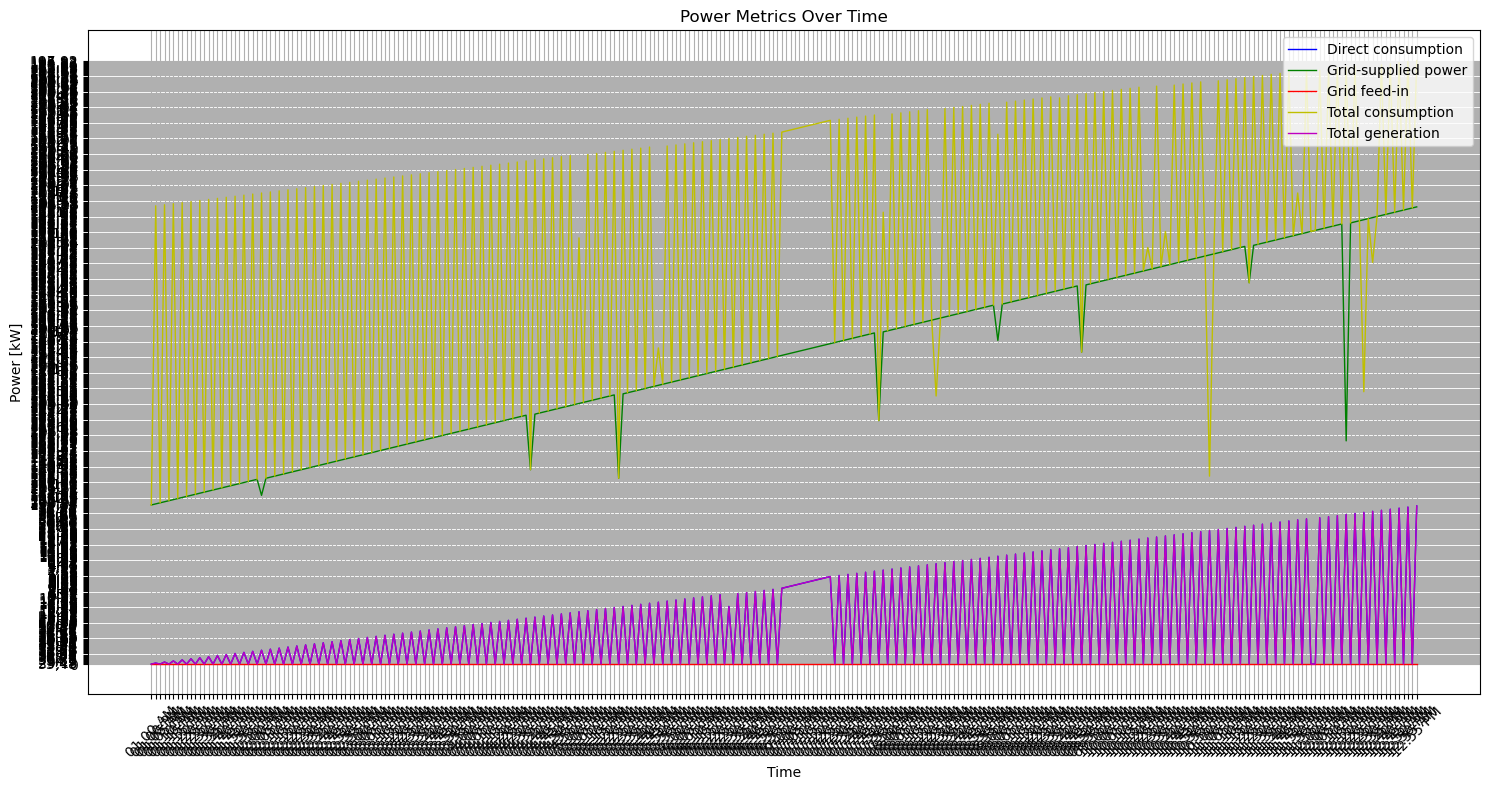

In [57]:
import matplotlib.pyplot as plt

# Créer une figure
fig, ax = plt.subplots(figsize=(15, 8))

# Tracer les données avec des couleurs différentes
ax.plot(dataframe.index, dataframe['Direct consumption [kW]'], 'b-', 
        label='Direct consumption', linewidth=1)
ax.plot(dataframe.index, dataframe['Grid-supplied power [kW]'], 'g-', 
        label='Grid-supplied power', linewidth=1)
ax.plot(dataframe.index, dataframe['Grid feed-in [kW]'], 'r-', 
        label='Grid feed-in', linewidth=1)
ax.plot(dataframe.index, dataframe['Total consumption [kW]'], 'y-', 
        label='Total consumption', linewidth=1)
ax.plot(dataframe.index, dataframe['Total generation [kW]'], 'm-', 
        label='Total generation', linewidth=1)

# Configurer les axes et les labels
ax.set_xlabel('Time')
ax.set_ylabel('Power [kW]')

# Rotation des étiquettes de l'axe x pour une meilleure lisibilité
plt.xticks(rotation=45)

# Ajouter la légende
ax.legend(loc='upper right')

# Titre du graphique
plt.title('Power Metrics Over Time')

# Ajuster la mise en page
plt.grid(True)
plt.tight_layout()

# Afficher le graphique
plt.show()